In [1]:
# Imports
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
# Defining functions
def first_system(alpha, x: float):
    # cut first 10 digits in order to prevent overflow
    decimal_digit_count = str(x)[::-1].find('.')
    if decimal_digit_count > 10:
        x = float(str(x)[:10])

    dx = alpha - x ** 2
    # update x
    return x + dx * 0.01

def second_system(alpha, x):
    # cut first 10 digits in order to prevent overflow
    decimal_digit_count = str(x)[::-1].find('.')
    if decimal_digit_count > 10:
        x = float(str(x)[:10])
        
    dx = alpha - 2 * x ** 2 - 3 
    # update x
    return x + dx * 0.01

In [3]:
def draw_bifurcation_diagram(ALPHA_RANGE, Y_AXIS_RANGE, function):
    """
    Function to draw bifurcation diagram with the given options
    @param ALPHA_RANGE: The range where alpha will iterate through
    @param Y_AXIS_RANGE: The range to display in the Y-axis on the screen
    @param function: Function to update x
    """
    # declare amount of change for each iteration for alpha
    alpha = ALPHA_RANGE[0]; d_alpha = 0.01

    alphas = []
    stable_path = []
    unstable_path = []
    epsilon = 0.01; x = epsilon
    while alpha < ALPHA_RANGE[1]:
        if alpha < 0 and function == first_system:
            alpha += d_alpha
            continue
            
        if alpha < 3 and function == second_system:
            alpha += d_alpha
            continue

        # skip first 200 iterations to make x converge to the equilibrium
        for _ in range(200): x = function(alpha, x)
            
        # for the next 1000 iterations, update x_next and try to come up with a path
        for _ in range(1000):
            x = function(alpha, x)
            stable_path.append(x)
            unstable_path.append(-x)
            alphas.append(alpha)

        # update alpha
        alpha += d_alpha
        
        # increase x with a very small cons
        x += epsilon

        
    # draw plot
    plt.pyplot.scatter(alphas, stable_path, s=1, facecolor='0.1', lw = 0, c='b', label='Stable')
    plt.pyplot.scatter(alphas, unstable_path, s=1, facecolor='0.1', lw = 0, c='r', label='Unstable')
    plt.pyplot.legend(loc="best")
    plt.pyplot.title(function.__name__)
    plt.pyplot.xlabel('alpha')
    plt.pyplot.ylabel('dx/dt')
    plt.pyplot.axis([ALPHA_RANGE[0], ALPHA_RANGE[1], Y_AXIS_RANGE[0], Y_AXIS_RANGE[1]])
    plt.pyplot.show()

In [4]:
def run():
    """
    Gets input from user and runs the required function to draw bifurcation diagram
    """
    flag = True
    selection = int(input('For which system the bifurcation diagram will be drawn?\n1- x_dot = alpha - x^2\n2- x_dot = alpha - 2*x^2 - 3\n'))
    if selection == 1:
        ALPHA_RANGE = [-1, 1]
        function = first_system
        Y_AXIS_LIMIT = [-1, 1]
    elif selection == 2:
        ALPHA_RANGE = [2, 8]
        function = second_system
        Y_AXIS_LIMIT = [-3, 3]
    else:
        print('Option must be either 1 or 2. Please run again.')
        flag = False

    if flag:
        draw_bifurcation_diagram(ALPHA_RANGE, Y_AXIS_LIMIT, function)

For which system the bifurcation diagram will be drawn?
1- x_dot = alpha - x^2
2- x_dot = alpha - 2*x^2 - 3
1


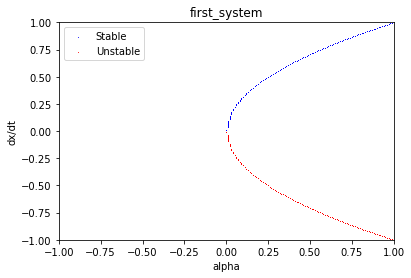

In [5]:
# Run this cell to draw bifurcation diagrams

run()